1. Introducción



### Importación de librerías

In [1]:
import kedro
print(kedro.__version__)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Configuración para que los gráficos se muestren en el Notebook
%matplotlib inline

0.19.11


In [2]:
%reload_ext kedro.ipython

[03/28/25 00:02:42] INFO     Registered line magic '%reload_kedro'                                   ]8;id=358699;file://C:\Users\herna\Desktop\data_mining\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=575158;file://C:\Users\herna\Desktop\data_mining\venv\Lib\site-packages\kedro\ipython\__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=982389;file://C:\Users\herna\Desktop\data_mining\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=488676;file://C:\Users\herna\Desktop\data_mining\venv\Lib\site-packages\kedro\ipython\__init__.py#65\65]8;;\

                    INFO     Resolved project path as:                                              ]8;id=337053;file://C:\Users\herna\Desktop\data_mining\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=270347;file://C:\Users\herna\Desktop\data_mining\venv\Lib\site-packages\kedro\ipython\__init__.py#180\180]8;;\
                             C:\Users\herna\Desktop\data_mining\weather-aus.                                       
                             To set a different path, run '%reload_kedro <project_root>'                           

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=796492;file://C:\Users\herna\Desktop\data_mining\venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=863716;file://C:\Users\herna\Desktop\data_mining\venv\Lib\site-packages\kedro_telemetry\plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[03/28/25 00:02:43] INFO     Kedro project weather_aus                                              ]8;id=839150;file://C:\Users\herna\Desktop\data_mining\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=158605;file://C:\Users\herna\Desktop\data_mining\venv\Lib\site-packages\kedro\ipython\__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=108972;file://C:\Users\herna\Desktop\data_mining\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=689187;file://C:\Users\herna\Desktop\data_mining\venv\Lib\site-packages\kedro\ipython\__init__.py#147\147]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=55065;file://C:\Users\herna\Desktop\data_mining\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=52402;file://C:\Users\herna\Desktop\data_mining\venv\Lib\site-packages\kedro\ipython\__init__.py#153\153]8;;\

### Carga de datos
Utilizando la variable global ('catalog') de Kedro, donde se almacena la información de los dataset como un catálogo de datos. Se procede a crear un dataframe, para obtener una primera impresión de sus registros y columnas.

In [3]:
df = catalog.load("csv_weather_aus") # 
df.head(10)

[03/28/25 00:02:50] INFO     Loading data from csv_weather_aus (CSVDataset)...                  ]8;id=539365;file://C:\Users\herna\Desktop\data_mining\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=460918;file://C:\Users\herna\Desktop\data_mining\venv\Lib\site-packages\kedro\io\data_catalog.py#390\390]8;;\

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


Revisamos las dimensiones del dataset en cuestión y sus tipos de datos.

In [4]:
print(f"Dimensiones del Dataset: Tiene {df.shape[0]} filas, y {df.shape[1]} columnas.")

Dimensiones del Dataset: Tiene 142193 filas, y 24 columnas.


Revisamos las 10 últimas filas del dataset.

In [5]:
df.tail(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142183,2017-06-15,Uluru,2.6,22.5,0.0,NaN,NaN,S,19.0,S,...,24.0,1025.0,1021.4,NaN,NaN,8.8,22.1,No,0.0,No
142184,2017-06-16,Uluru,5.2,24.3,0.0,NaN,NaN,E,24.0,SE,...,24.0,1023.8,1020.0,NaN,NaN,12.3,23.3,No,0.0,No
142185,2017-06-17,Uluru,6.4,23.4,0.0,NaN,NaN,ESE,31.0,S,...,25.0,1025.8,1023.0,NaN,NaN,11.2,23.1,No,0.0,No
142186,2017-06-18,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,0.0,No
142187,2017-06-19,Uluru,7.4,20.6,0.0,NaN,NaN,E,35.0,ESE,...,33.0,1027.2,1023.3,NaN,NaN,11.0,20.3,No,0.0,No
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


### Información y Tipos de Datos
Con el método .info() podemos ver la estructura del DataFrame, identificar el tipo de cada variable y detectar posibles valores nulos. Esto es esencial para determinar qué variables requieren limpieza o transformación.

In [6]:
# Información general del dataset
print("Información del dataset:")
df.info()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Clou

### Análisis de Valores Nulos y Duplicados
Identificar la cantidad y distribución de valores faltantes es crucial para planificar las estrategias de limpieza. Además, revisaremos la presencia de registros duplicados que podrían sesgar el análisis.

In [7]:
# Verificar la cantidad de valores nulos en cada columna
missing_values = df.isnull().sum().sort_values(ascending=False)
print("\nValores nulos por columna:\n")
print(missing_values)

# Revisar si existen registros duplicados
duplicates = df.duplicated().sum()
print("\nCantidad de registros duplicados:", duplicates, "registros.")



Valores nulos por columna:

Sunshine         67816
Evaporation      60843
Cloud3pm         57094
Cloud9am         53657
Pressure9am      14014
Pressure3pm      13981
WindDir9am       10013
WindGustDir       9330
WindGustSpeed     9270
WindDir3pm        3778
Humidity3pm       3610
Temp3pm           2726
WindSpeed3pm      2630
Humidity9am       1774
Rainfall          1406
RainToday         1406
WindSpeed9am      1348
Temp9am            904
MinTemp            637
MaxTemp            322
Location             0
Date                 0
RISK_MM              0
RainTomorrow         0
dtype: int64

Cantidad de registros duplicados: 0 registros.


### Conversión de Tipos de Datos
Recomendaciones basadas en el caso de estudio:

Fecha: Convertir la columna Date de string a datetime para extraer información temporal (año, mes, día de la semana).

Variables Categóricas: Convertir columnas como Location, RainToday, RainTomorrow y las de direcciones del viento (WindGustDir, WindDir9am, WindDir3pm) a tipo category para optimizar la memoria y facilitar el análisis.

Variables Numéricas: Verificar que las columnas numéricas se encuentren en el formato adecuado y, en caso contrario, convertirlas utilizando pd.to_numeric.

In [8]:
# Convertir la columna 'Date' a datetime
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convertir variables categóricas
categorical_cols = ['Location', 'RainToday', 'RainTomorrow', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Ejemplo de conversión para columnas numéricas (verifica según tu dataset)
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 
                'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Verificar nuevamente la información del dataset después de las conversiones
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  category      
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  category      
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  category      
 10  WindDir3pm     138415 non-null  category      
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

### Estadísticas Descriptivas
Se obtienen estadísticas descriptivas para las variables numéricas y categóricas. Esto permite conocer la distribución, la media, la desviación estándar y otros percentiles que pueden ser útiles para detectar posibles outliers o comportamientos anómalos.

In [9]:
# Estadísticas descriptivas de variables numéricas
display(df.describe())

# Estadísticas para variables categóricas (si es necesario)
display(df.describe(include=['category']))


,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,142193,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,2013-04-01 00:28:51.730816512,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
min,2007-11-01 00:00:00,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,2011-01-06 00:00:00,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,2013-05-27 00:00:00,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,2015-06-12 00:00:00,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,2017-06-25 00:00:00,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000
std,NaN,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969


,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,132863,132180,138415,140787,142193
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3418,9780,11393,10663,109332,110316


### Análisis de Valores Faltantes
Es fundamental identificar la proporción y el patrón de los valores faltantes. Esto nos ayudará a decidir estrategias de imputación o eliminación.

Se utilizará un heatmap para visualizar la presencia de valores faltantes y, opcionalmente, la librería 'missingno' para un análisis interactivo.

Porcentaje de valores faltantes por columna:


,Porcentaje de valores nulos
Sunshine,47.692924
Evaporation,42.789026
Cloud3pm,40.152469
Cloud9am,37.735332
Pressure9am,9.855619
Pressure3pm,9.832411
WindDir9am,7.041838
WindGustDir,6.561504
WindGustSpeed,6.519308
WindDir3pm,2.656952


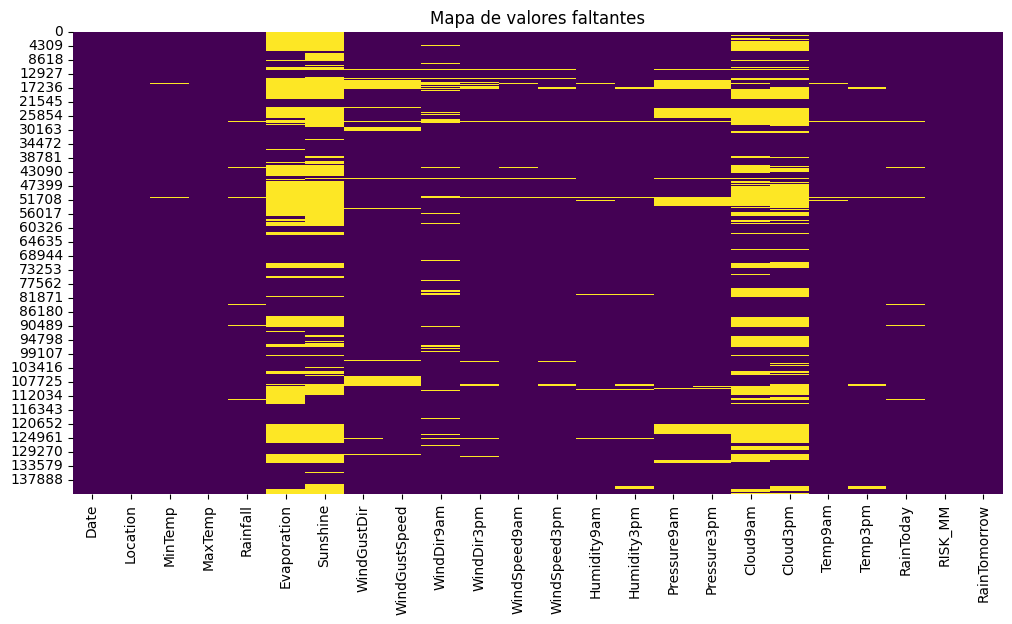

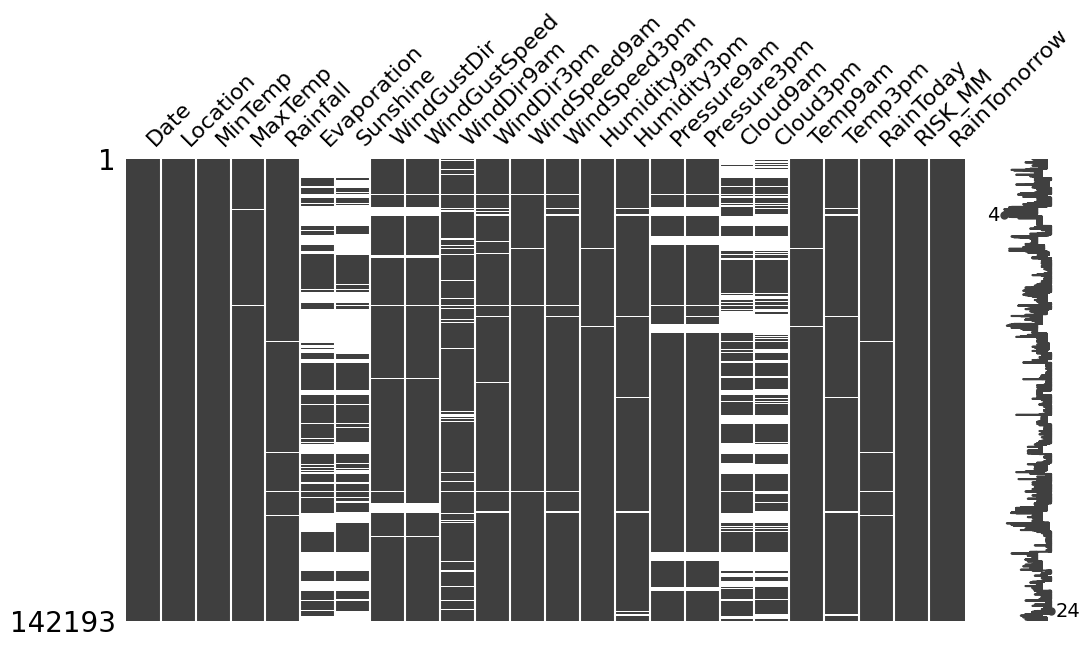

In [10]:
# Calcular el porcentaje de valores nulos por columna
missing_pct = df.isnull().mean() * 100
missing_df = pd.DataFrame({'Porcentaje de valores nulos': missing_pct}).sort_values(by='Porcentaje de valores nulos', ascending=False)
print("Porcentaje de valores faltantes por columna:")
display(missing_df)

# Visualizar valores faltantes mediante un heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de valores faltantes")
plt.show()

# Opcional: Visualización interactiva con missingno
try:
    msno.matrix(df, figsize=(12, 6))
    plt.show()
except ImportError:
    print("La librería missingno no está instalada. Puedes instalarla con '!pip install missingno'")


### Análisis de Variables Numéricas: Distribuciones y Detección de Outliers

Visualizaremos histogramas y boxplots de las variables numéricas para comprender su distribución y detectar la presencia de outliers, lo cual es fundamental para definir estrategias de transformación o limpieza.


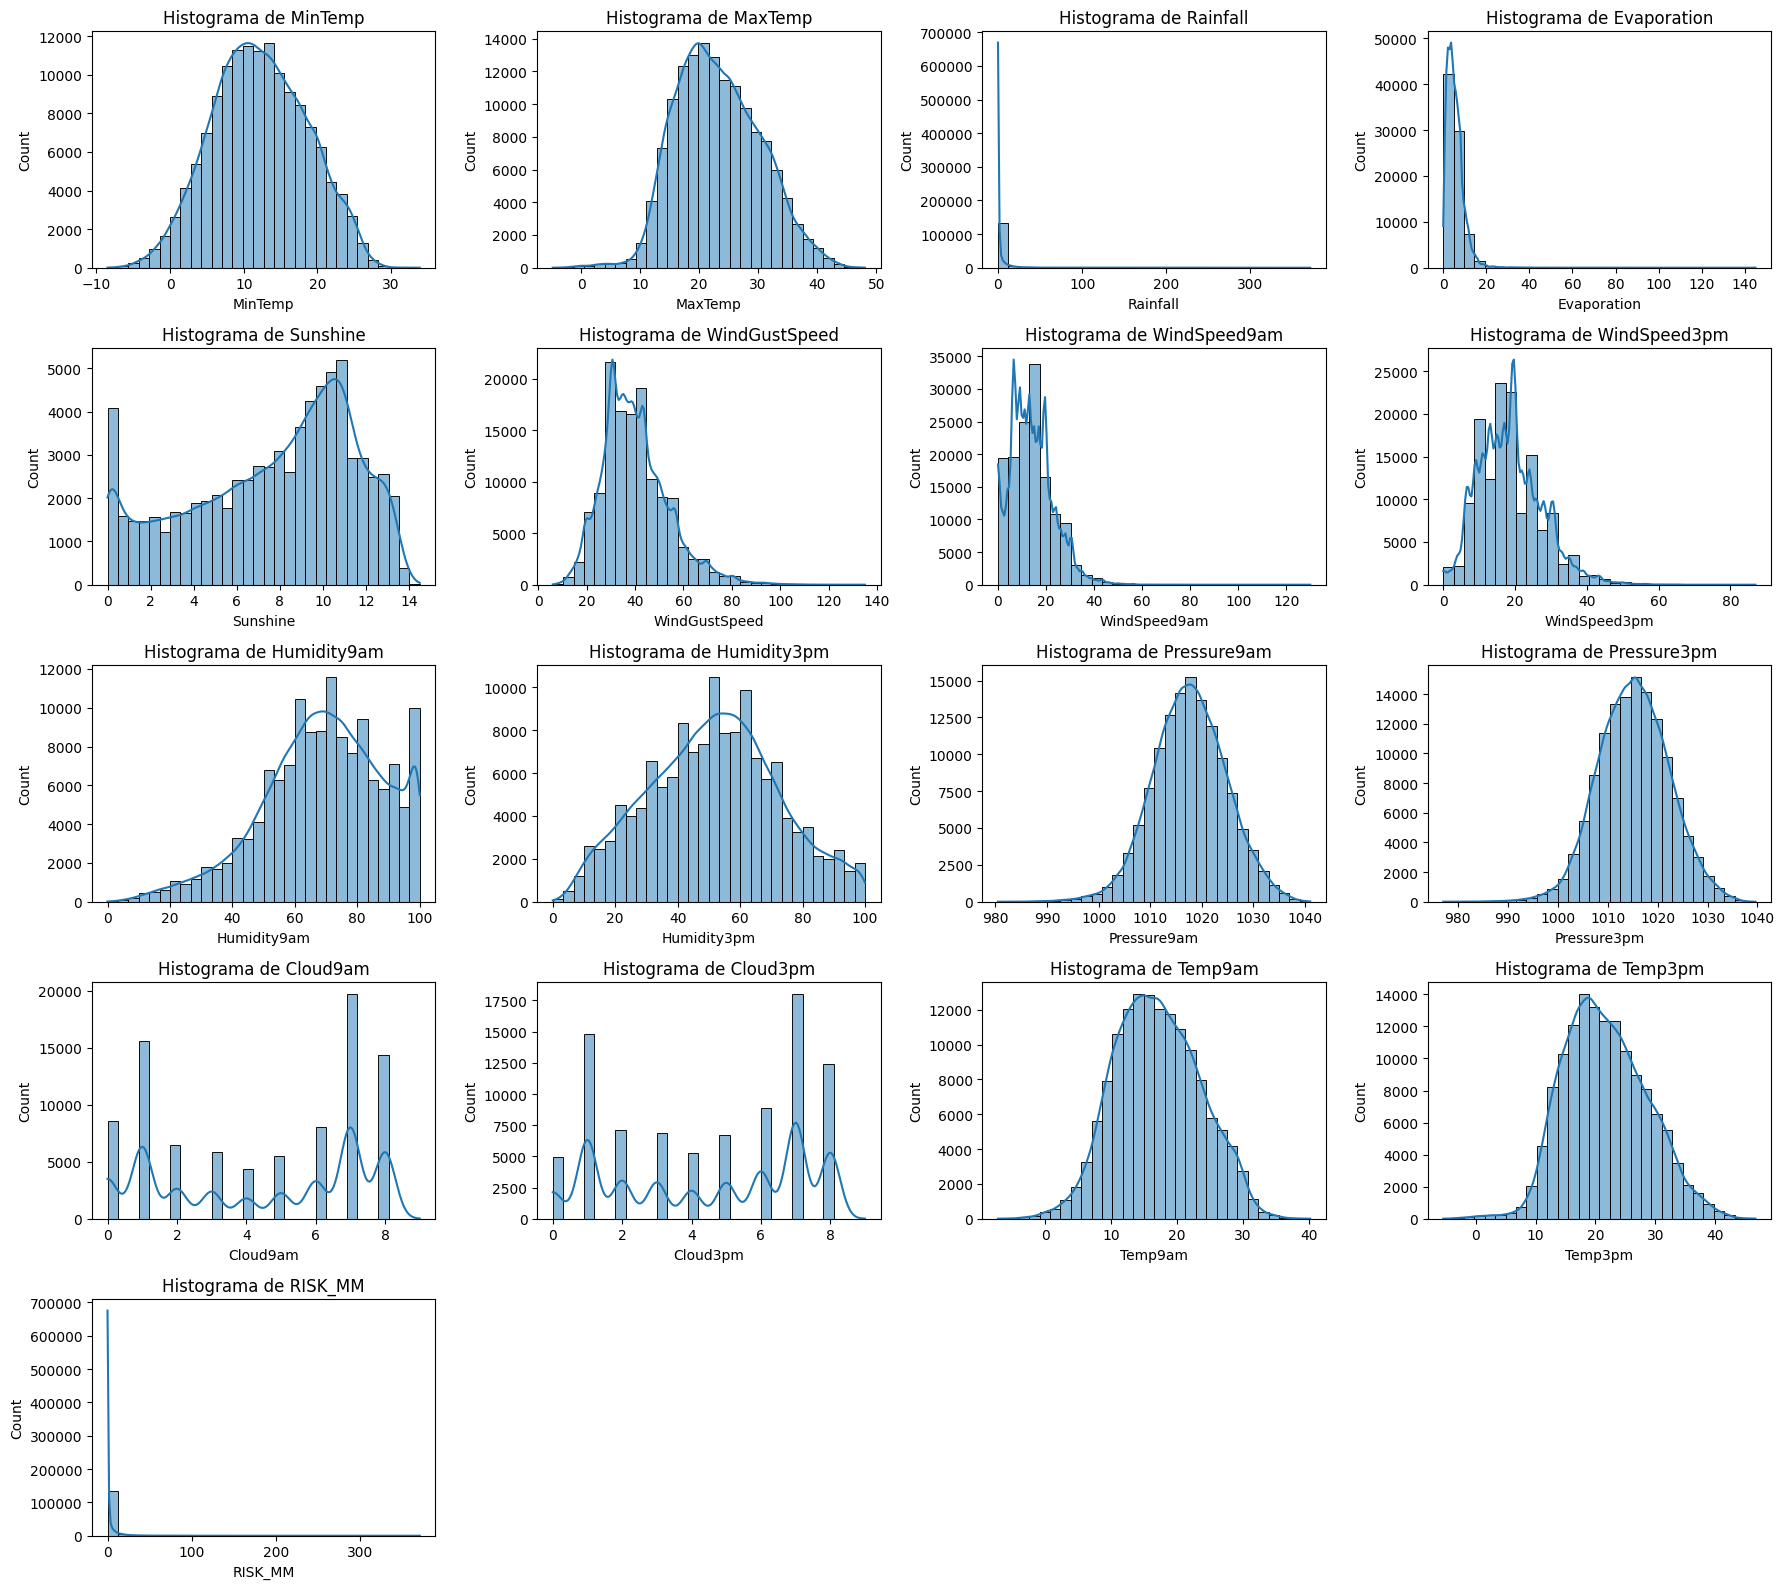

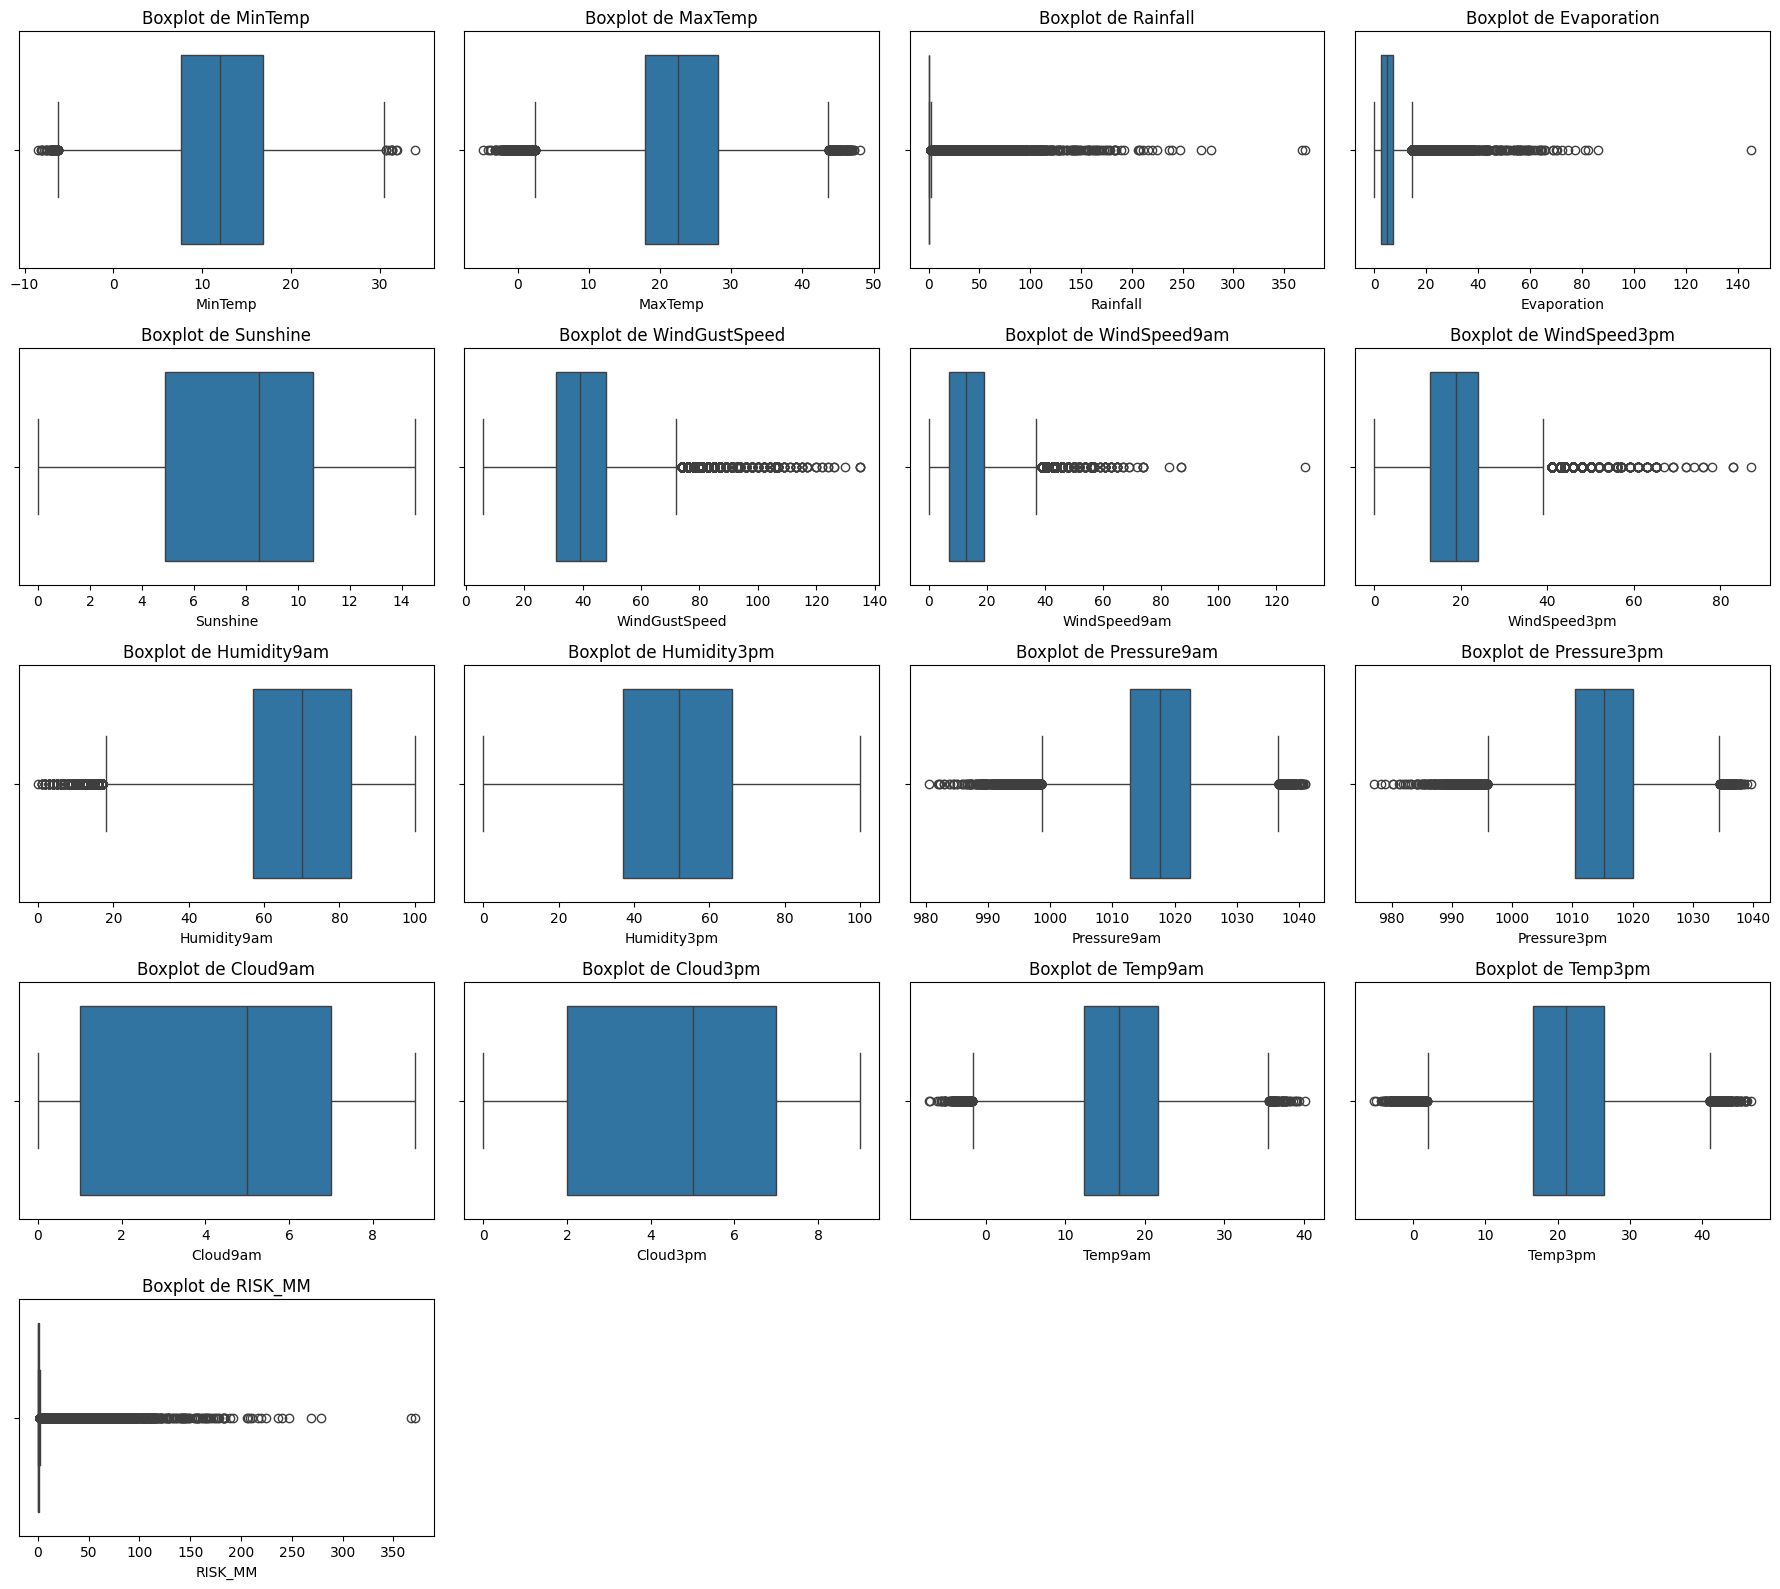

In [12]:
# Identificar columnas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Histogramas
plt.figure(figsize=(18, 16))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Histograma de {col}')
plt.tight_layout()
plt.show()

# Boxplots para detectar outliers
plt.figure(figsize=(18, 16))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()


### Análisis de Variables Categóricas

Se examinan las distribuciones de las variables categóricas mediante gráficos de barras.  
Esto es especialmente relevante para detectar posibles desequilibrios en la variable objetivo (*RainTomorrow*) y en otras variables cualitativas como la dirección del viento.


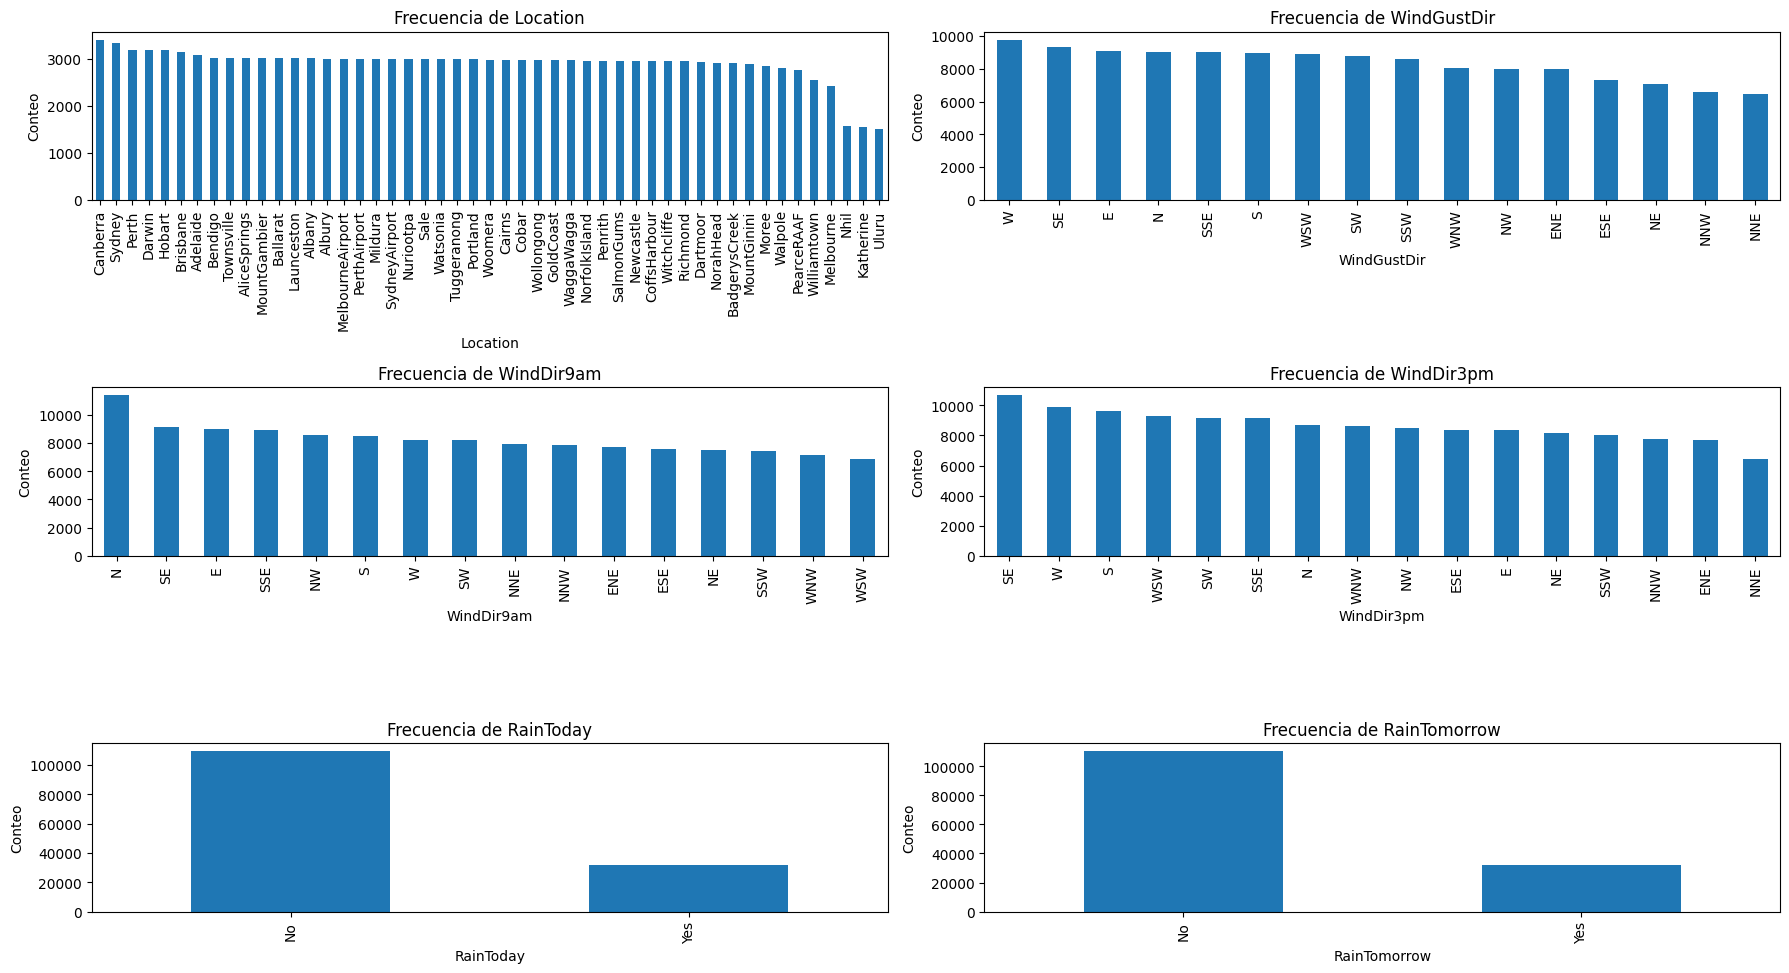

In [13]:
# Identificar columnas categóricas
categorical_cols = df.select_dtypes(include=['category']).columns

plt.figure(figsize=(18, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(6, 2, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Frecuencia de {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
plt.tight_layout()
plt.show()
